In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 

# Analyse NCDF

In [2]:
#folder= "/home/peter/EasterIslands/Code/Full_Model/#Figs/FullModel_grid50_repr0,07_06Apr/"
folder = "/home/peter/EasterIslands/Code/Full_Model/Figs/FullModel_grid50_repr0,007_06Ap_AlphaSetting/"

In [3]:
data = xr.open_dataset(folder+"Statistics.ncdf")
data

<xarray.Dataset>
Dimensions:              (index: 479, time: 1001, triangles: 2768)
Coordinates:
  * time                 (time) int64 800 801 802 803 ... 1797 1798 1799 1800
  * index                (index) int64 0 1 2 3 4 5 6 ... 473 474 475 476 477 478
  * triangles            (triangles) int64 0 1 2 3 4 ... 2764 2765 2766 2767
Data variables:
    total_agents         (time) int64 ...
    total_population     (time) int64 ...
    total_deaths         (time) int64 ...
    total_trees          (time) int64 ...
    tree_density         (triangles, time) float64 ...
    agriculture          (triangles, time) float64 ...
    populationOccupancy  (triangles, time) float64 ...
    happyFraction        (time) float64 ...
Attributes:
    firesLoc:                                                       [  66.   ...
    firesSize:                                                      [229. 228...
    firesTime:                                                      [ 939.  9...
    MaxSettlementSl

(0, 1.015625)

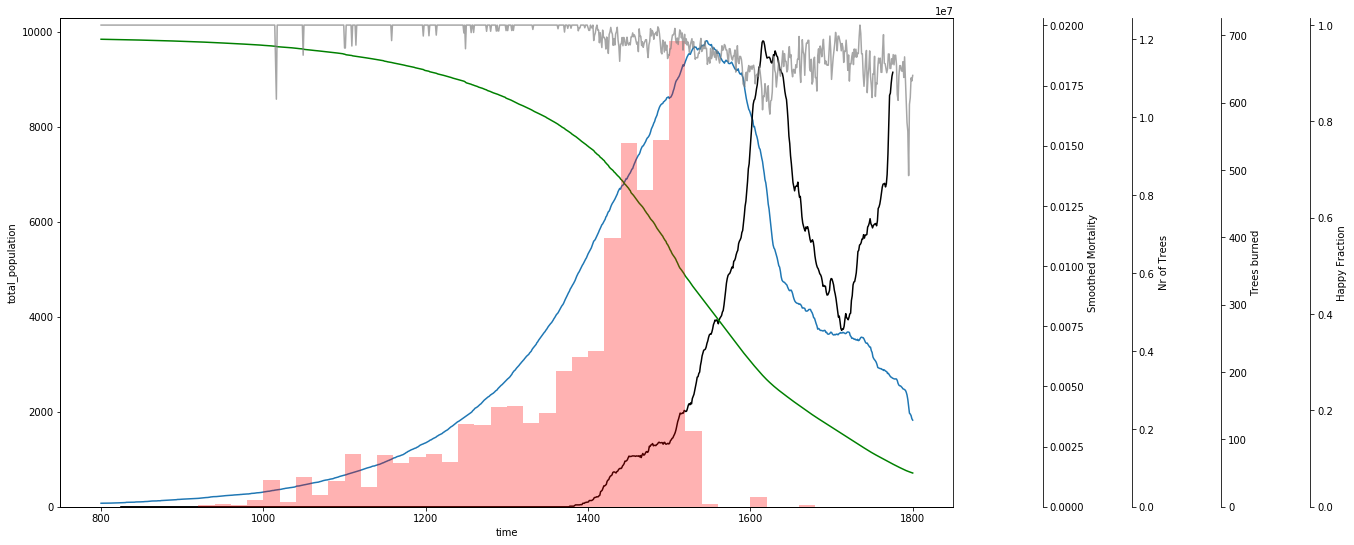

In [11]:
fig = plt.figure(figsize=(16,9))
ax1=fig.add_subplot(111)
ax1.spines["right"].set_position(('axes',1.0))
data.total_population.plot()
ax1.spines["right"].set_position(('axes',1.0))
ax1.set_ylim(0,)


ax2=ax1.twinx()

mortality = data.total_deaths/data.total_population
N=50
mortality_smoothed = np.convolve(mortality, np.ones((N,))/N, mode='valid')
time_smoothed = np.convolve(data.time, np.ones((N,))/N, mode='valid')

ax2.plot(time_smoothed, mortality_smoothed, color="k")
ax2.set_ylabel("Smoothed Mortality")
ax2.spines["right"].set_position(('axes',1.1))
ax2.set_ylim(0,)

ax3=ax1.twinx()
ax3.spines["right"].set_position(('axes',1.2))
data.total_trees.plot(color='green')
ax3.set_ylabel("Nr of Trees")
ax3.set_ylim(0,)

ax4=ax1.twinx()
ax4.spines['right'].set_position(('axes',1.3))
plt.hist(data.firesTime, bins=np.arange(data.time[0],data.time[-1]+1, step=20), alpha=0.3, color='red')
ax4.set_ylabel("Trees burned")
ax4.set_ylim(0,)

ax5=ax1.twinx()
ax5.spines["right"].set_position(('axes',1.4))
data.happyFraction.plot(color='gray', alpha=0.7)
ax5.set_ylabel("Happy Fraction")
ax5.set_ylim(0,)

# MAP

In [13]:
import pickle
import config
from pathlib import Path   # for creating a new directory
filename = "Map/EI_grid"+str(data.gridpoints_y)+"_rad"+str(data.tree_search_radius)+"+"+str(data.agriculture_radius)
if Path(filename).is_file():
    with open(filename, "rb") as EIfile:
        config.EI = pickle.load(EIfile)
from observefunc import observe_density


In [14]:
def get_fires_in_t(t_0, t_1):
    fires_points=[]
    n=0
    while data.firesTime[n]<t_0:
        pass
    while data.firesTime[n]<t_1 and data.firesTime[n]>=t_0:
    #inds = np.where(data.firesTime==t)[0]
    #for n in inds:
        loc = config.EI.EI_midpoints[int(data.firesLoc[n])]
        fires_points.append([loc[0], loc[1], data.firesSize[n]])
        n+=1
    fires_points=np.array(fires_points)
    return fires_points


In [17]:
fires_points = get_fires_in_t(1100,1200)

(array([ 21.,  21.,  17.,  32.,  68.,  20.,  38.,  35.,  45., 191.]),
 array([  3. ,  50.5,  98. , 145.5, 193. , 240.5, 288. , 335.5, 383. ,
        430.5, 478. ]),
 <a list of 10 Patch objects>)

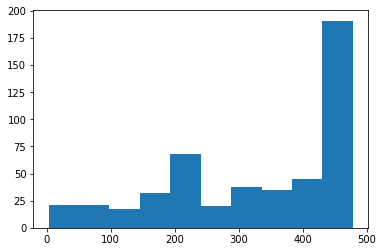

In [18]:
plt.hist(fires_points[:,2])

In [62]:
times_to_plot = np.arange(1200,1210,step=10)
for t in times_to_plot:
    fires_points = get_fires_in_t(t-10, t)
    config.EI.tree_density = data.tree_density.sel(time=t)
    fig, ax = config.EI.plot_TreeMap_and_hist()
    plot = ax.scatter(fires_points[:,0], config.EI.corners['upper_left'][1] - fires_points[:,1], s=10*fires_points[:,2]/max(fires_points[:,2]), color='red')


In [ ]:
times_to_plot = np.arange(1200,1210,step=10)

times_to_plot

In [45]:
fires_points

array([[ 15.79083688,   4.18971373, 229.        ],
       [ 15.79083688,   4.18971373, 228.        ],
       [ 15.79083688,   4.18971373, 213.        ],
       ...,
       [  5.33474219,  11.25237403, 127.        ],
       [  3.62762469,  11.97061067, 317.        ],
       [  3.73431953,  12.32972899, 381.        ]])

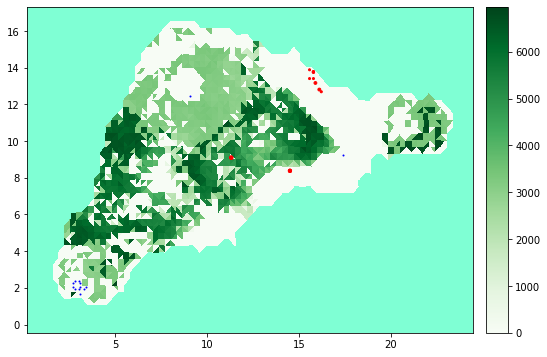

In [56]:
fires_points[:,2]/max(fires_points[:,2])

array([0.48516949, 0.48305085, 0.45127119, 0.48305085, 0.47033898,
       0.40466102, 0.79025424, 0.81144068, 1.        , 1.        ,
       1.        , 1.        , 0.09957627, 0.39830508, 0.40677966,
       0.9809322 , 0.99576271, 0.4279661 ])